# Exemple de la page Web (voir slide)

* 310 vs 300 secondes
* sigma = 50
* Je pense que si dark mode les gens restent plus logntemps
* H1 = Le dark mode sert
* H0 = Le dark mode ne sert pas

In [418]:
from scipy.stats import norm

print("Z", (310-300)/(50/100**.5))
X = norm(300, 50/100**.5)
p_value = 1- X.cdf(310)  # Cumulative Distribution Function (CDF)
print("p", round(p_value, 2))

Z 2.0
p 0.02


# QUONTO

* To make sure the company stays profitable, they need to have an average default rate below **8.5%**
* We've gathered data on different loans
* Your goal is to test whether the algorithm respects the maximum default loan rate.

## Step 1 - Import libraries

In [419]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Step 2 - Import Dataset

In [420]:
df = pd.read_csv("../../99-assets/Python/qonto_loans.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE
0,182940,0,Cash loans,F,N,N,0,90000.0,835380.0,23571.0,675000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.019689
1,397049,1,Cash loans,M,Y,Y,0,225000.0,254700.0,20250.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.018029
2,120845,1,Cash loans,M,Y,Y,3,135000.0,755190.0,38686.5,675000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.025164
3,155211,0,Revolving loans,M,N,N,2,180000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.007305
4,172542,0,Cash loans,M,N,Y,0,270000.0,781920.0,33129.0,675000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.007330


## Step 3 - EDA (Exploratory Data Analysis)

In [421]:
df.describe(include="all")                    # Voir le include="all"

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE
count,10000.000000,10000.000000,10000,10000,10000,10000,10000.000000,1.000000e+04,1.000000e+04,9999.000000,9.997000e+03,9965,10000,10000,10000,10000,10000.000000
unique,NaN,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,7,6,5,5,6,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,NaN,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,NaN
freq,NaN,NaN,9073,6642,6610,6884,NaN,NaN,NaN,NaN,NaN,8158,5129,6968,6327,8847,NaN
mean,278434.555600,0.077500,NaN,NaN,NaN,NaN,0.419200,1.677800e+05,6.034761e+05,26909.101710,5.414610e+05,NaN,NaN,NaN,NaN,NaN,0.021051
std,103005.459546,0.267397,NaN,NaN,NaN,NaN,0.747213,9.376608e+04,4.015770e+05,14132.620434,3.679354e+05,NaN,NaN,NaN,NaN,NaN,0.014012
min,100077.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.655000e+04,4.500000e+04,1980.000000,4.500000e+04,NaN,NaN,NaN,NaN,NaN,0.000533
25%,187556.750000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.762775e+05,16551.000000,2.385000e+05,NaN,NaN,NaN,NaN,NaN,0.010032
50%,279763.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.485000e+05,5.212800e+05,24822.000000,4.500000e+05,NaN,NaN,NaN,NaN,NaN,0.018850
75%,367411.750000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.100000e+05,34049.250000,6.795000e+05,NaN,NaN,NaN,NaN,NaN,0.028663


## Step 4 - Define hypothesises

In [422]:
H1 = "Le taux de défaut est <  8.5%"
H0 = "Le taux de défaut est >= 8.5 %"

## Step 5 - Calculate Z-score

In `../../99-assets\Python\qonto_loans_columns_description.xlsx` we learn that TARGET is the column containing the feature of interrest 

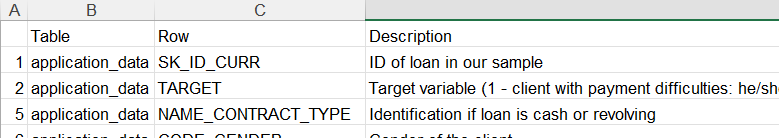

The formula to use is :

<img src="../../99-assets/Python/Z-score.png">


In [423]:
X_bar = df.TARGET.mean()                                # Voir la notation df.TARGET.mean() au lieu de df["TARGET"].mean()
mu = 8.5 / 100.0                                        
sigma = df.TARGET.std()
n = len(df) 
Z = (X_bar - mu) / (sigma / n**.5)

# Z
# print(Z)
print(f"La valeur du z score est : {Z:.3f}")                  # Identique aux lignes précédentes mais plus clean

La valeur du z score est : -2.805


## Step 6 - Set $\alpha$

In [424]:
alpha = 0.05

## Step 7 - Compare p-value to $\alpha$ puis conclure (ou pas)

### À propos de la fonction `ztest()` du module `statsmodels.stats.weightstats`
#### Lire : 
* https://www.statology.org/z-test-python/ 
* https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ztest.html

#### Notes
* x1 = values for the first sample
* x2 = values for the second sample (if performing a two sample z-test)
* value = mean of x1 under the null hypothesis H0 (in one sample case) or the difference of the means (in two sample case)
* alternative = 
  * H1, the alternative hypothesis, has to be one of the following : 
    * larger    : difference in means larger than value 
    * smaller   : difference in means smaller than value
    * two-sided : difference in means not equal to value (default value)


In [425]:
from statsmodels.stats.weightstats import ztest                                   # on fait l'importation ici juste pour l'exemple

# Ici on a 1 seul jeu 
# value = la moyenne de la population de référence avec qui on se compare => 8.5
# alternative = Au step 4, sous H1, on dit que le taux est inférieur à 8.5% => smaller  

z_score, p_value = ztest(df.TARGET, value=mu, alternative="smaller")
print(f"La p-value calculée avec ztest() est : {p_value:.4f}") 


from scipy.stats import norm                                                      # pour montrer d'où provient la fonction norm
X = norm(mu, (df.TARGET.std() / len(df) ** 0.5))
p_value2 = X.cdf(df.TARGET.mean())                                                # Cumulative Distribution Function (CDF)
print(f"La p-value calculée avec cdf() est   : {p_value:.4f}") 
print("")
# Compare p-value to confidence level
# Conclude (ou pas)
if p_value < alpha:
  print("HO est rejetée donc H1 est acceptée")
  print(f"Pour rappel H1 = {H1}")
else:
  print("H0 ne peut pas être rejetée. On ne peut pas conclure")
  print(f"Pour rappel H0 = {H0}")

La p-value calculée avec ztest() est : 0.0025
La p-value calculée avec cdf() est   : 0.0025

HO est rejetée donc H1 est acceptée
Pour rappel H1 = Le taux de défaut est <  8.5%


## Step 8 (Optional) - Visualize probability

### Interlude : une façon de tracer une courbe

In [426]:
x_values = np.arange(-4, 4, 0.01)

print("Les 20 premières valeurs des abcisses : ")
print(x_values[0:20])
print()

print("Les 20 dernières valeurs des abcisses : ")
print(x_values[-21:-1])


Les 20 premières valeurs des abcisses : 
[-4.   -3.99 -3.98 -3.97 -3.96 -3.95 -3.94 -3.93 -3.92 -3.91 -3.9  -3.89
 -3.88 -3.87 -3.86 -3.85 -3.84 -3.83 -3.82 -3.81]

Les 20 dernières valeurs des abcisses : 
[3.79 3.8  3.81 3.82 3.83 3.84 3.85 3.86 3.87 3.88 3.89 3.9  3.91 3.92
 3.93 3.94 3.95 3.96 3.97 3.98]


In [427]:
y_values = []
for x in x_values:
  y = math.sin (math.pi*x/4)
  y_values.append(y)

print("Les 20 premières valeurs des ordonnées : ")
print(y_values[0:20])

print()

print("Les 20 dernières valeurs des ordonnées : ")
print(y_values[-21:-1])



Les 20 premières valeurs des ordonnées : 
[-1.2246467991473532e-16, -0.007853900888711412, -0.015707317311820266, -0.0235597648336097, -0.03141075907812779, -0.03925981575906806, -0.04710645070964163, -0.05495017991244467, -0.06279051952931225, -0.07062698593116552, -0.07845909572784329, -0.08628636579792168, -0.09410831331851258, -0.10192445579504782, -0.10973431109104301, -0.11753739745783534, -0.1253332335643019, -0.13312133852654953, -0.14090123193757978, -0.1486724338969201]

Les 20 dernières valeurs des ordonnées : 
[0.1641868465689918, 0.15643446504035993, 0.14867243389705226, 0.14090123193771256, 0.13312133852668245, 0.12533323356443452, 0.11753739745796808, 0.1097343110911763, 0.10192445579518124, 0.09410831331864566, 0.08628636579805529, 0.07845909572797699, 0.07062698593129885, 0.06279051952944566, 0.054950179912578584, 0.047106450709775594, 0.03925981575920163, 0.0314107590782614, 0.023559764833743776, 0.015707317311954364]


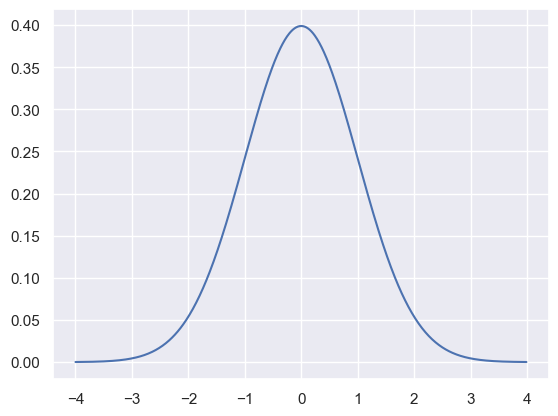

In [491]:
bob, zoubida = plt.subplots()
_ = zoubida.plot(x_values, y_values)

### Décomposition de l'affichage de la courbe

In [429]:
# Génère des valeurs entre -4 et 4 espacées de .01
x_values = np.arange(-4, 4, 0.01)

print("Les 20 premières valeurs des abcisses : ")
print(x_values[0:20])

print()

print("Les 20 dernières valeurs des abcisses : ")
print(x_values[-21:-1])



Les 20 premières valeurs des abcisses : 
[-4.   -3.99 -3.98 -3.97 -3.96 -3.95 -3.94 -3.93 -3.92 -3.91 -3.9  -3.89
 -3.88 -3.87 -3.86 -3.85 -3.84 -3.83 -3.82 -3.81]

Les 20 dernières valeurs des abcisses : 
[3.79 3.8  3.81 3.82 3.83 3.84 3.85 3.86 3.87 3.88 3.89 3.9  3.91 3.92
 3.93 3.94 3.95 3.96 3.97 3.98]


In [430]:
# Génère une courbe de Gauss entre -4 et 4 avec une moyenne à 0 et un ecart type de 1

mean_target = 0
std_target = 1
y_values = norm.pdf(x_values, mean_target, std_target)

print("Les 20 premières valeurs des ordonnées : ")
print(y_values[0:20])

print()

print("Les 20 dernières valeurs des ordonnées : ")
print(y_values[-21:-1])



Les 20 premières valeurs des ordonnées : 
[0.00013383 0.00013928 0.00014495 0.00015083 0.00015693 0.00016326
 0.00016983 0.00017664 0.00018371 0.00019105 0.00019866 0.00020655
 0.00021473 0.00022321 0.00023201 0.00024113 0.00025058 0.00026037
 0.00027053 0.00028105]

Les 20 dernières valeurs des ordonnées : 
[0.00030324 0.00029195 0.00028105 0.00027053 0.00026037 0.00025058
 0.00024113 0.00023201 0.00022321 0.00021473 0.00020655 0.00019866
 0.00019105 0.00018371 0.00017664 0.00016983 0.00016326 0.00015693
 0.00015083 0.00014495]


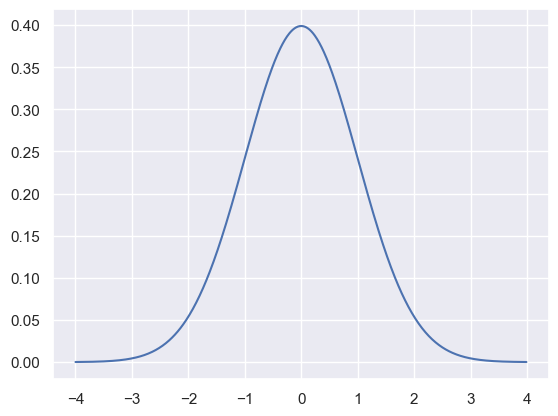

In [431]:
# On trace y_values en fonction de x_values

fig, ax = plt.subplots()
_ = ax.plot(x_values, y_values)


In [432]:
print(f"La valeur du z score est : {Z:.3f}")

La valeur du z score est : -2.805


In [433]:
# génère des abcisses entre -4 et z_score espacées de .01
x_values2 = np.arange(-4, z_score, 0.01)

print("Les 20 premières valeurs des abcisses : ")
print(x_values2[-20:])

print()

print("Les 20 dernières valeurs des abcisses : ")
print(x_values2[-21:-1])


Les 20 premières valeurs des abcisses : 
[-3.   -2.99 -2.98 -2.97 -2.96 -2.95 -2.94 -2.93 -2.92 -2.91 -2.9  -2.89
 -2.88 -2.87 -2.86 -2.85 -2.84 -2.83 -2.82 -2.81]

Les 20 dernières valeurs des abcisses : 
[-3.01 -3.   -2.99 -2.98 -2.97 -2.96 -2.95 -2.94 -2.93 -2.92 -2.91 -2.9
 -2.89 -2.88 -2.87 -2.86 -2.85 -2.84 -2.83 -2.82]


In [434]:
# Génère le début d'une courbe de Gauss entre -4 et z_score (moyenne à 0 et ecart type de 1)

y_values2 = norm.pdf(x_values2, mean_target, std_target)

print("Les 20 premières valeurs des ordonnées : ")
print(y_values2[0:20])
print()

Les 20 premières valeurs des ordonnées : 
[0.00013383 0.00013928 0.00014495 0.00015083 0.00015693 0.00016326
 0.00016983 0.00017664 0.00018371 0.00019105 0.00019866 0.00020655
 0.00021473 0.00022321 0.00023201 0.00024113 0.00025058 0.00026037
 0.00027053 0.00028105]



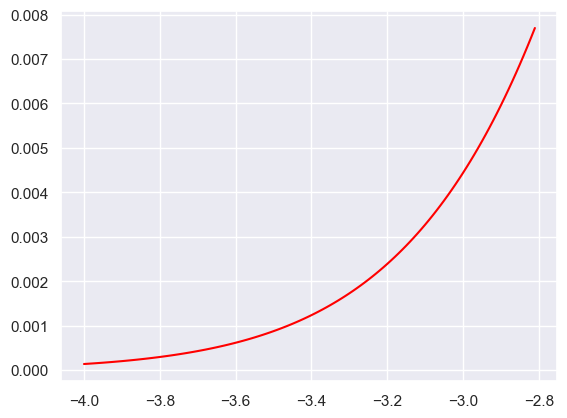

In [435]:
# On trace y_values2 en fonction de x_values2
fig, ax = plt.subplots()

_ = ax.plot(x_values2, y_values2, color="red")



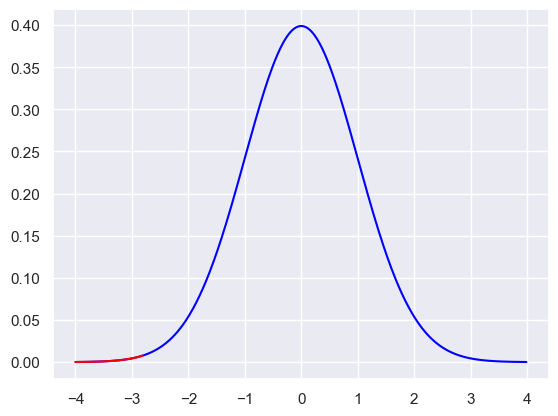

In [436]:
# Affiche les 2 courbes précédentes sur le même graphe
fig, ax = plt.subplots()

# la courbe bleue
ax.plot(x_values, y_values, color="blue")

# la courbe rouge
_ = ax.plot(x_values2, y_values2, color="red")


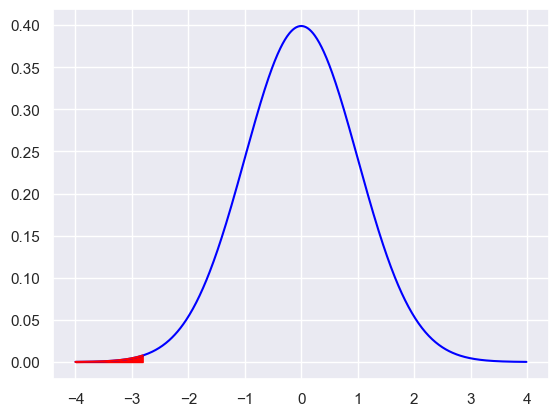

In [437]:
# Affiche les 2 courbes précédentes sur le même graphe
# Remplissage sous la courbe rouge
fig, ax = plt.subplots()

# la courbe bleue
ax.plot(x_values, y_values, color="blue")

# la courbe rouge
ax.plot(x_values2, y_values2, color="red")
_ = ax.fill_between(x_values2, y_values2, 0, color="red")


### Affichage de la courbe de QUONTO (enfin !)

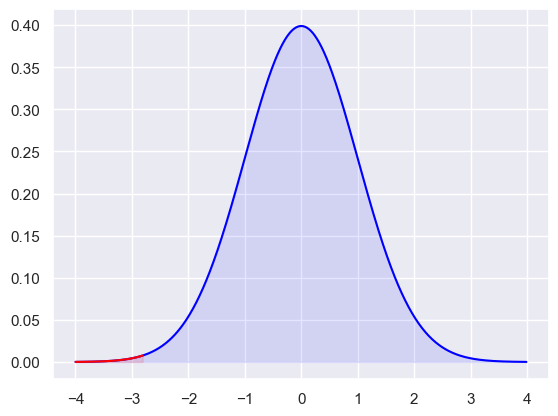

In [438]:
# Génère des valeurs entre -4 et 4 espacées de .01
x_values = np.arange(-4, 4, 0.01)

# Génère les valeurs d'une gaussienne dont la moyenne est à 0 et l'écart type vaut 1 
# pour l'ensemble des x_values
mean_target = 0
std_target = 1
y_values = norm.pdf(x_values, mean_target, std_target)        # pdf = Probability density function 

# Crée une figure et un jeu d'axes
fig, ax = plt.subplots()

# Affiche y en fonction de x
ax.plot(x_values, y_values, color="blue")

# Rempli sous la courbe
ax.fill_between(x_values, y_values, 0, color="blue", alpha=0.1)          # alpha est un paramètre de transparence => bleu pâle

# En fonction du z_score
if z_score < 0:
    # Crée un jeu de x entre -4 et z
    x_values2 = np.arange(-4, z_score, 0.01)
else:
    # ou entre z et 4
    x_values2 = np.arange(z_score, 4, 0.01)

# Génère les valeurs d'une gaussienne dont la moyenne est à 0 et l'écart type vaut 1 
# pour l'ensemble des x_values2
y_values2 = norm.pdf(x_values2, mean_target, std_target)
# Affiche y_values2 en fonction de x_values2
ax.plot(x_values2, y_values2, color="red", alpha=1.00)
# Rempli sous la courbe 
_ = ax.fill_between(x_values2, y_values2, 0, color="red", alpha=0.1)

C:\Users\phili\AppData\Local\Temp\ipykernel_19308\2392036163.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(np.random.normal(0, 1, size=1000000), hist=None)
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before 

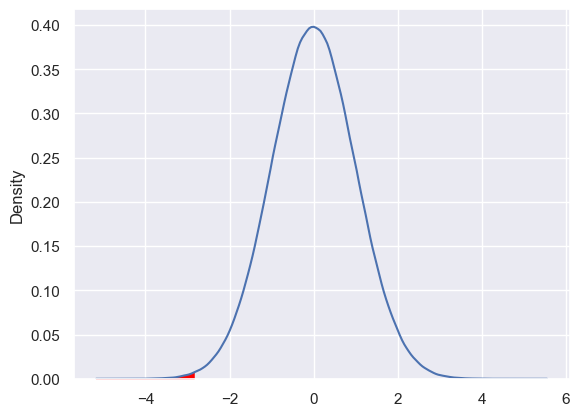

In [439]:
# Le code proposé en solution sur Julie
# En 2023 il génère pas mal de warnings

# ! Faut aussi regarder le temps d'exécution
# Ce code met 4 sec alors que le précédent met 0.1 sec...

### Visualize area under curve
import seaborn as sns

# Displot from seaborn gives us a distribution from what is inside the parenthesis
# np.random.normal simulates a normal distribution 
# hist=None simply stats that we don't want a histogram
ax = sns.distplot(np.random.normal(0, 1, size=1000000), hist=None) 

# This is a mask that will let us filter only the values beyond z-score
mask = ax.lines[0].get_xydata()[:, 0] < z_score ## Only modify the operator sign (<, >) depending on your problem

# This will get the coordinates of all the data points beyon z-score
x_area_under_curve = ax.lines[0].get_xydata()[:, 0][mask]
y_area_under_curve = ax.lines[0].get_xydata()[:, 1][mask]

# We finally fill the area with red
ax.fill_between(x_area_under_curve, y_area_under_curve, color="red")
plt.show()


# SWILE

* Swile provided you with some data about sales before the marketing campaign. 
* Our goal will be to check whether this marketing campaign was a genius idea or a huge failure so that the company could replicate it abroad.
* This dataset describes the number of calls on the same day in France and abroad. 
* **The only difference** between these two samples is the impact of Marketing campaign.
* Test whether **the average number of calls in France is actually higher** than the ones abroad.

## Step 1 - Import libraries

In [440]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ztest
from scipy.stats import norm

## Step 2 - Import Dataset

In [441]:
df = pd.read_csv("../../99-assets/Python/swile_sales_calls.csv")
df.head()

,calls_abroad,calls_in_France
0,4,6
1,4,2
2,4,9
3,9,9
4,2,9


## Step 3 - EDA (Exploratory Data Analysis)

Appels           : 5.500
Appels en France : 5.786


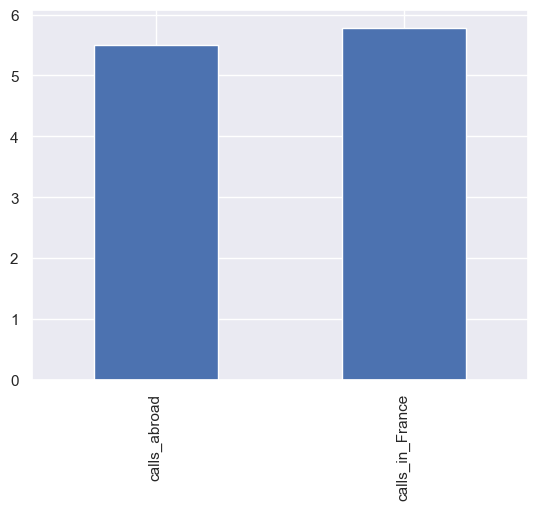

In [442]:
print(f"Appels           : {df.calls_abroad.mean():.3f}")
print(f"Appels en France : {df.calls_in_France.mean():.3f}")

Means = df.mean()
_ = Means.plot(kind="bar")

## Step 4 - Define hypothesises

In [443]:
H1 = "La moyenne du nb d'appels en France est supérieure à celle des autres pays (5.5)"
H0 = "La moyenne du nb d'appels en France est inférieure ou égale à celle des autres pays"

## Step 5 - Calculate Z-score

L'énoncé nous dit d'utiliser cette formule:


<img src="../../99-assets/Python/Z-score4swile.png" width=10%>


In [444]:
# Méthode 1
X_bar = df.mean()["calls_in_France"]
mu = df.mean()["calls_abroad"]
s = df.std()["calls_in_France"]
n = len(df)
z_score = (X_bar - mu) / (s / np.sqrt(n))
print("Méthode 1 : z_score  = ", z_score)
print("")

# Méthode 2
X_bar = df.calls_in_France.mean()                             # ! Voir la notation df.calls_in_France.mean()
mu = df.calls_abroad.mean()       
s = df.calls_in_France.std()
n = len(df)
z_score = (X_bar - mu) / (s / (n**0.5))
print("Méthode 2 : z_score  = ", z_score)
print("")

# Méthode 3
X_bar = df["calls_in_France"].mean()                          # ! Voir la notation df["calls_in_France"].mean()
mu = df["calls_abroad"].mean()                                # C'est celle que je préfère  
s = df["calls_in_France"].std()
n = len(df)
z_score = (X_bar - mu) / (s / np.sqrt(n))
print("Méthode 3 : z_score  = ", z_score)
print("")


Méthode 1 : z_score  =  1.1664524375772458

Méthode 2 : z_score  =  1.1664524375772458

Méthode 3 : z_score  =  1.1664524375772458



## Step 6 - Set $\alpha$

In [445]:
alpha = 0.1

## Step 7 - Compare p-value to $\alpha$ puis conclure (ou pas)

### À propos de la fonction `ztest()` du module statsmodels.stats.weightstats
#### Lire : 
* https://www.statology.org/z-test-python/ 
* https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ztest.html

#### Notes
* x1 = values for the first sample
* x2 = values for the second sample (if performing a two sample z-test)
* value = mean of x1 under the null hypothesis H0 (in one sample case) or the difference of the means (in two sample case)
* alternative = 
  * H1, the alternative hypothesis, has to be one of the following : 
    * larger    : difference in means larger than value 
    * smaller   : difference in means smaller than value
    * two-sided : difference in means not equal to value (default value)


In [446]:
# Méthode 1
# Ici on a 1 seul jeu 
# value = la moyenne de la population de référence avec qui on se compare => MoyAbroad
# alternative = sous H1 on dit que "La moyenne du nb d'appels en France est supérieure..." => larger  
z_score, p_value = ztest(df["calls_in_France"], value=mu, alternative="larger")
print(f"Méthode 1 : z_score  = {z_score:.4f}")
print(f"Méthode 1 : p_value  = {p_value:.4f}")
print("")

# Méthode 2
n = len(df)
X = norm(df.calls_in_France.mean(), (df.calls_in_France.std() / (n ** 0.5)))
p_value = X.cdf(df["calls_abroad"].mean())                    # cdf => Cumulative Distribution Function
print(f"Méthode 2 : p_value  = {p_value:.4f}")


Méthode 1 : z_score  = 1.1665
Méthode 1 : p_value  = 0.1217

Méthode 2 : p_value  = 0.1217


In [447]:
if p_value < alpha:
    print("HO est rejetée donc H1 est acceptée")
    print(f"Pour rappel H1 = {H1}")
else:
    print("H0 ne peut pas être rejetée. On ne peut pas conclure")
    print(f"Pour rappel H0 = {H0}")

H0 ne peut pas être rejetée. On ne peut pas conclure
Pour rappel H0 = La moyenne du nb d'appels en France est inférieure ou égale à celle des autres pays


## Step 8 (Optional) - Visualize probability

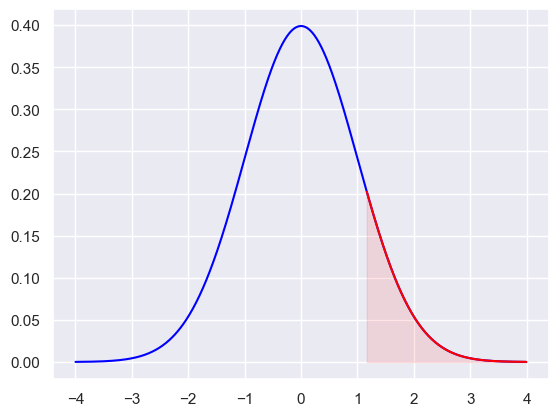

In [448]:
x_values = np.arange(-4, 4, 0.01)

mean_target = 0
std_target = 1
# Probability density function 
y_values = norm.pdf(x_values, mean_target, std_target)


fig, ax = plt.subplots()
ax.plot(x_values, y_values, color="blue", alpha=1.00)
#ax.fill_between(x_values, y_values, 0, color="blue", alpha=0.1)

if z_score < 0:
    x_values2 = np.arange(-4, z_score, 0.01)
else:
    x_values2 = np.arange(z_score, 4, 0.01)

y_values2 = norm.pdf(x_values2, mean_target, std_target)
ax.plot(x_values2, y_values2, color="red", alpha=1.00)
_ = ax.fill_between(x_values2, y_values2, 0, color="red", alpha=0.1)

C:\Users\phili\AppData\Local\Temp\ipykernel_19308\4092215216.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(np.random.normal(0, 1, size=1000000), hist=None)
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

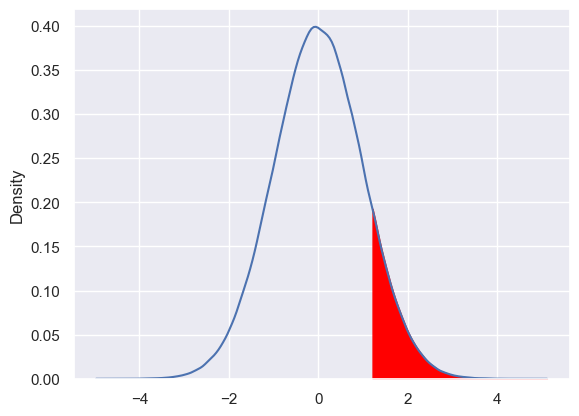

In [449]:
# Le code proposé en solution sur Julie
# En 2023 il génère pas mal de warnings

ax = sns.distplot(np.random.normal(0, 1, size=1000000), hist=None) 

# This is a mask that will let us filter only the values beyond z-score
mask = ax.lines[0].get_xydata()[:, 0] > z_score ## Only modify the operator sign (<, >) depending on your problem

# This will get the coordinates of all the data points beyon z-score
x_area_under_curve = ax.lines[0].get_xydata()[:, 0][mask]
y_area_under_curve = ax.lines[0].get_xydata()[:, 1][mask]

# We finally fill the area with red
ax.fill_between(x_area_under_curve, y_area_under_curve, color="red")
plt.show()

### Updating code that uses seaborn.distplot

lire : https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


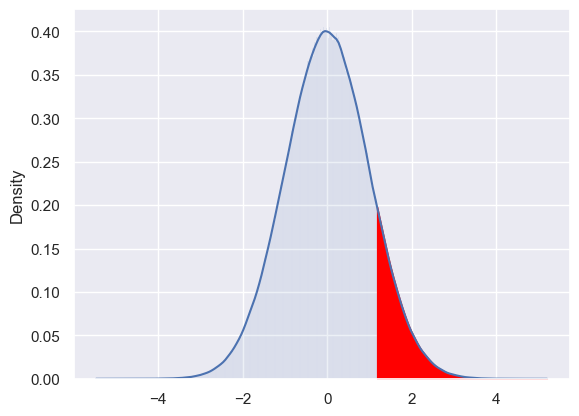

In [450]:
import seaborn as sns
sns.set_theme()
df = sns.load_dataset("penguins")

ax = sns.histplot(np.random.normal(0, 1, size=1000000), kde=True, stat="density", kde_kws=dict(cut=3), alpha=.1, edgecolor=(1, 1, 1, .4)) 
# This is a mask that will let us filter only the values beyond z-score
mask = ax.lines[0].get_xydata()[:, 0] > z_score ## Only modify the operator sign (<, >) depending on your problem

# This will get the coordinates of all the data points beyon z-score
x_area_under_curve = ax.lines[0].get_xydata()[:, 0][mask]
y_area_under_curve = ax.lines[0].get_xydata()[:, 1][mask]

# We finally fill the area with red
_ = ax.fill_between(x_area_under_curve, y_area_under_curve, color="red")




# Spendesk 
* Spendesk really would like to prove is that their platform save at least **26 days** of work to their customers

## Step 1 - Import libraries

In [451]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ztest
from scipy.stats import norm

## Step 2 - Import Dataset

In [452]:
df = pd.read_csv("../../99-assets/Python/spendesk_survey.csv")
df.head()

,Time_for_producing_income_statement_before,Time_for_producing_income_statement_after
0,11,75
1,13,72
2,38,15
3,28,34
4,39,17


## Step 3 - EDA (Exploratory Data Analysis)

Mean before        : 65.73
Mean after         : 41.03
Difference des moy : 24.70


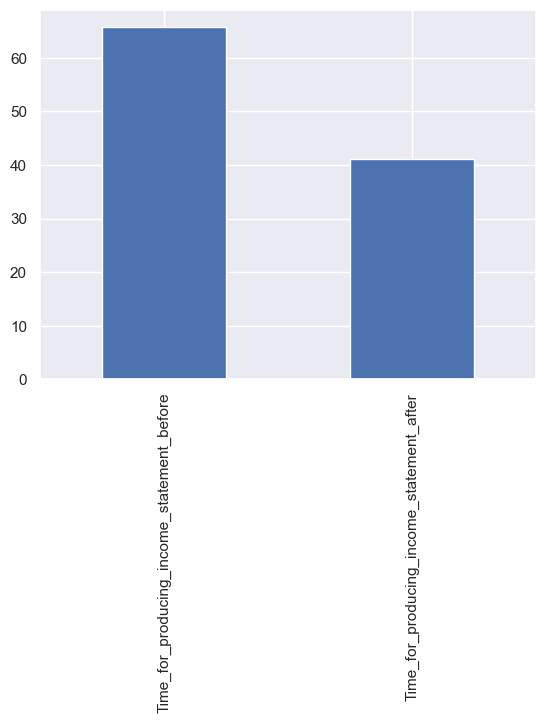

In [453]:
MeanBefore = df.Time_for_producing_income_statement_before.mean()
MeanAfter  = df.Time_for_producing_income_statement_after.mean()

print(f"Mean before        : {MeanBefore:.2f}")
print(f"Mean after         : {MeanAfter:.2f}")
print(f"Difference des moy : {MeanBefore-MeanAfter:.2f}")

Means = df.mean()
_ = Means.plot(kind="bar")

In [454]:
boost = (MeanBefore - MeanAfter) / MeanBefore
print(f"Réduction moyenne : {boost*100:.2f}%")

Réduction moyenne : 37.58%


In [455]:
# On crée une nouvelle colonne "time_diff" dans le data frame 
# La colonne contient les différences entre after et before
df["time_diff"] = df["Time_for_producing_income_statement_before"] - df["Time_for_producing_income_statement_after"]
df.head()



,Time_for_producing_income_statement_before,Time_for_producing_income_statement_after,time_diff
0,11,75,-64
1,13,72,-59
2,38,15,23
3,28,34,-6
4,39,17,22


Time_for_producing_income_statement_before    65.731333
Time_for_producing_income_statement_after     41.026667
time_diff                                     24.704667
dtype: float64


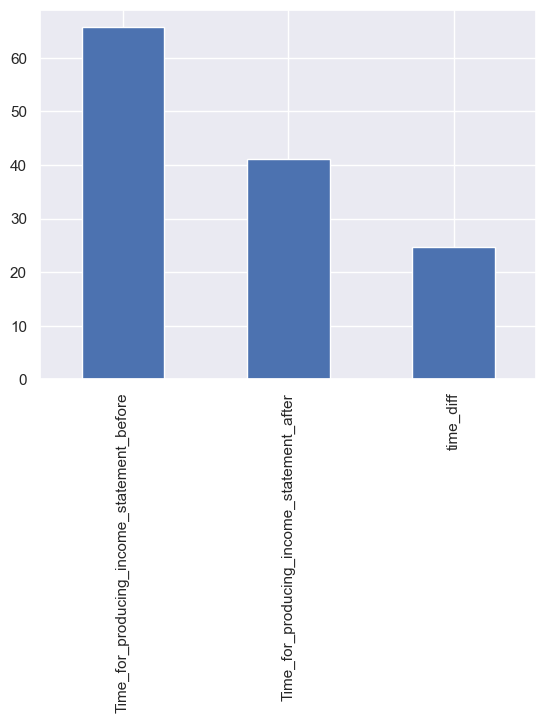

In [456]:
Means = df.mean()
print(Means)
_ = Means.plot(kind="bar")

## Step 4 - Define hypothesises

* One thing that Spendesk really would like to prove is that their platform save at least 26 days of work to their customers. 
* This would be a great for sales to be able to showcase a number saying something like:
  * Our customers take 26 days less on average to produce financial statements when using Spendesk

In [457]:
H1 = "the platform saves 26 or more of days of work"
H0 = "the platform save less than 26 days of work"

## Step 5 - Calculate Z-score

<img src="../../99-assets/Python/Z-score4swile.png" width=10%>


In [458]:
X_bar = df.time_diff.mean()
mu = 26
s = df.time_diff.std()
n = len(df)
z_score = (X_bar - mu) / (s / n**0.5)
z_score

-1.321211217800986

## Step 6 - Set $\alpha$

In [459]:
alpha = 10 / 100

## Step 7 - Calculate p_value

### À propos de la fonction `ztest()` du module statsmodels.stats.weightstats
#### Lire : 
* https://www.statology.org/z-test-python/ 
* https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ztest.html

#### Notes
* x1 = values for the first sample
* x2 = values for the second sample (if performing a two sample z-test)
* value = mean of x1 under the null hypothesis H0 (in one sample case) or the difference of the means (in two sample case)
* alternative = 
  * H1, the alternative hypothesis, has to be one of the following : 
    * larger    : difference in means larger than value 
    * smaller   : difference in means smaller than value
    * two-sided : difference in means not equal to value (default value)


In [460]:
# Ici on a 1 seul jeu. La colonne time_diff
# value = la moyenne de la population de référence avec qui on se compare => 26
# alternative = sous H1 on dit que "the platform saves 26 or more of days of work" => larger  
z_score, p_value = ztest(df.time_diff, value=26, alternative="larger")
print(f"z_score  = {z_score:.02f}")
print(f"p_value  =  {p_value:.02f}")
print()


if p_value < alpha:
    print("HO est rejetée donc H1 est acceptée")
    print(f"Pour rappel H1 = {H1}")
else:
    print("H0 ne peut pas être rejetée. On ne peut pas conclure")
    print(f"Pour rappel H0 = {H0}")

z_score  = -1.32
p_value  =  0.91

H0 ne peut pas être rejetée. On ne peut pas conclure
Pour rappel H0 = the platform save less than 26 days of work


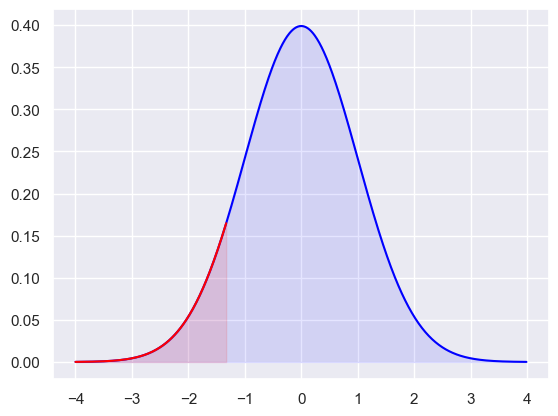

In [461]:
x_values = np.arange(-4, 4, 0.01)
mean_target = 0
std_target = 1
y_values = norm.pdf(x_values, mean_target, std_target)

if z_score < 0:
    x_values2 = np.arange(-4, z_score, 0.01)
else:
    x_values2 = np.arange(z_score, 4, 0.01)

y_values2 = norm.pdf(x_values2, mean_target, std_target)



fig, ax = plt.subplots()

# la courbe bleue
ax.plot(x_values, y_values, color="blue")
ax.fill_between(x_values, y_values, 0, color="blue", alpha=0.1)

# la rouge
ax.plot(x_values2, y_values2, color="red")
_ = ax.fill_between(x_values2, y_values2, 0, color="red", alpha=0.1)


# Vinted
They asked you to run an A/B test to determine which version would provide **more conversions**.

## Step 1 - Import Libraries

In [462]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest

## Step 2 - Import dataset

In [463]:
df = pd.read_csv("../../99-assets/Python/vinted_website_optimization.csv")
df.head(10)

,Feature_A,Feature_B
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
5,0,0
6,0,0
7,1,0
8,0,0
9,0,0


## Step 3 - EDA (Exploratory Data Analysis)
Let's first see the proportion of conversion for Feature A as well as Feature B


In [464]:
convert_A = df.Feature_A.sum()
convert_A = convert_A/len(df)
print(f"Taux de conversion A : {convert_A}")

print(f"Taux de conversion A : {df.Feature_A.mean()}\n")        # voir que cette ligne est équivalente aux 3 lignes précédentes

print(f"Taux de conversion B : {df.Feature_B.mean()}")       

Taux de conversion A : 0.086
Taux de conversion A : 0.086

Taux de conversion B : 0.126


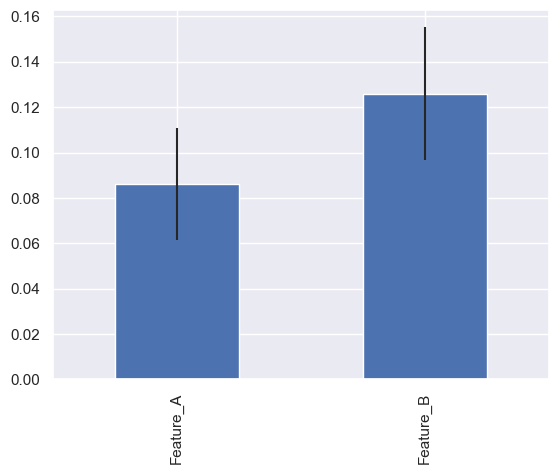

In [465]:
# Construction de l'intervale de confiance
# ©️ Asma 😊
# Le cahier des charges dit intervalle de confiance 95%, donc t = 1.96
t = 1.96
n = len(df)
err = t * df.std() / n**0.5

# Pour yerr voir https://pandas.pydata.org/pandas-docs/version/0.23/visualization.html#visualization-errorbars
_ = df.mean().plot(kind="bar", yerr=err)

## Step 4 - Define hypothesis

Dans le cours on a dit :

<img src="../../99-assets/Python/H0H1-ABTesting.png">

* The average conversion for A minus the average conversion for B is equal to 0
  * which would mean that your variation has no significative impact compared to your control variable.
* The average conversion for A minus the average conversion for B is either greater or less than 0
  * which would mean that your variation has significative impact compared to your control variable.

In [466]:
# Les hypothèses sous forme de chaines pour les utiliser en fin de programme
H1 = "The conversions rate are differents"
H0 = "The conversions rate are equal"

## Step 5 - Calculate Z-score

<img src="../../99-assets/Python/Z-score4vinted.png" width=20%>

In [467]:
muA = df.Feature_A.mean()
muB = df.Feature_B.mean()
print(f"{muA:.3f}")
print(f"{muB:.3f}")

sigmaA = df.Feature_A.std()
sigmaB = df.Feature_B.std()

n = len(df)

denom = sigmaB**2/n
denom = denom + sigmaA**2/n
denom = denom**.5
z_score = (muB - muA)/denom
print(f"z_score  = {z_score:.03f}\n")

0.086
0.126
z_score  = 2.057



## Step 6 - Set $\alpha$

Confidence level = 95%

In [468]:
alpha = .05

## Step 7 - Compare p-value to $\alpha$ puis conclure (ou pas)

### À propos de la fonction `ztest()` du module statsmodels.stats.weightstats
#### Lire : 
* https://www.statology.org/z-test-python/ 
* https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ztest.html

#### Notes
* x1 = values for the first sample
* x2 = values for the second sample (if performing a two sample z-test)
* value = mean of x1 under the null hypothesis H0 (in one sample case) or the difference of the means (in two sample case)
* alternative = 
  * H1, the alternative hypothesis, has to be one of the following : 
    * larger    : difference in means larger than value 
    * smaller   : difference in means smaller than value
    * two-sided : difference in means not equal to value (default value)


In [469]:
# On veut tester si A est significativement plus petit que B
# Il ne faut pas s'étonner que z-score soit négatif ci-dessous car dans le calcul précédent (Step 5) on faisait µB - µA
# Ici on passe Feature_A en premier puis Freature_B en second
z_score, p_value = ztest(df.Feature_A, df.Feature_B, value = 0, alternative="smaller")  
print(f"z_score  = {z_score:.04f}")
print(f"p_value  = {p_value:.04f}\n")

# La bonne façon d'appeler ztest
# Ici z_score aura le bon signe car on passe Feature_B en premier et ztest calculra donc bien µB - µA
# Vérifier que A est significativement plus petit que B  revient à tester si B est significativement plus grand que A => Larger
z_score, p_value = ztest(df.Feature_B, df.Feature_A, value = 0, alternative="larger")  
print(f"z_score  = {z_score:.04f}")
print(f"p_value  = {p_value:.04f}\n")

if p_value < alpha:
    print("HO est rejetée donc H1 est acceptée")
    print(f"Pour rappel H1 = {H1}")
else:
    print("H0 ne peut pas être rejetée. On ne peut pas conclure")
    print(f"Pour rappel H0 = {H0}")


z_score  = -2.0568
p_value  = 0.0199

z_score  = 2.0568
p_value  = 0.0199

HO est rejetée donc H1 est acceptée
Pour rappel H1 = The conversions rate are differents


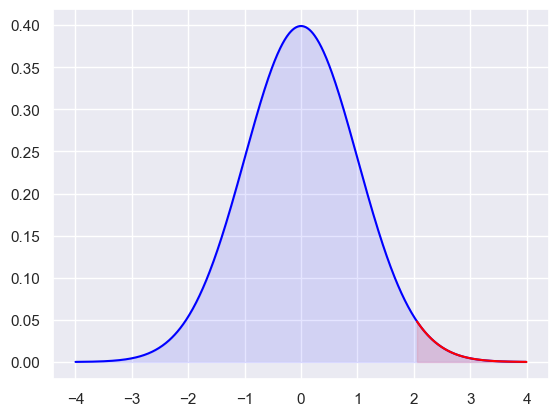

In [470]:
x_values = np.arange(-4, 4, 0.01)

mean_target = 0
std_target = 1
y_values = norm.pdf(x_values, mean_target, std_target)


fig, ax = plt.subplots()
ax.plot(x_values, y_values, color="blue", alpha=1.00)
ax.fill_between(x_values, y_values, 0, color="blue", alpha=0.1)

if z_score < 0:
    x_values2 = np.arange(-4, z_score, 0.01)
else:
    x_values2 = np.arange(z_score, 4, 0.01)

y_values2 = norm.pdf(x_values2, mean_target, std_target)
ax.plot(x_values2, y_values2, color="red", alpha=1.00)
_ = ax.fill_between(x_values2, y_values2, 0, color="red", alpha=0.1)

# airbnb
During the olympics, the Data and Design team were hesitating between two background images for the website that you can see below

* Now Airbnb performed an A/B test
* A random sample of their users got to see the website with feature A and another part got to see feature B.
* The results are listed in airbnb_cover_test.xlsx. 
* Perform an hypothesis test proving that one feature is really better than the other one.

## Step 1 - Import Libraries

In [471]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest

## Step 2 - Import dataset

In [472]:
df = pd.read_excel("../../99-assets/Python/airbnb_cover_test.xlsx")
df.head()

,Feature,Converted
0,B,0
1,B,0
2,B,0
3,B,0
4,B,0


## Step 3 - EDA (Exploratory Data Analysis)
 Proportion of conversion for Feature A & B


In [473]:
# Méthode 1
df.groupby("Feature").mean()



,Converted
Feature,
A,0.088604
B,0.096856


In [474]:
# C'est la proposition de la solution
# En 2023 elle emet beaucoup de warning
# DONE : à refaire sans les warnings

# sns.catplot(x="Feature", y="Converted", data=df, kind="bar", errorbar=('ci', 95))


<Axes: xlabel='Feature'>

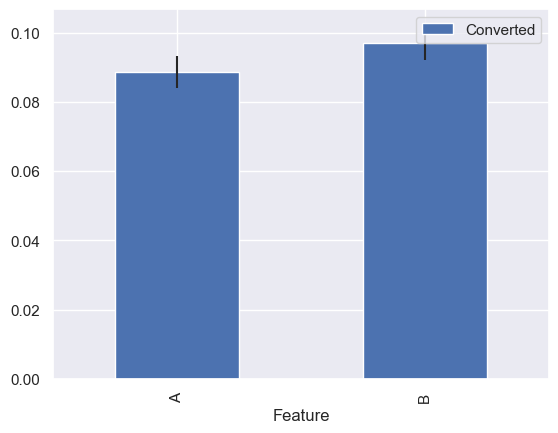

In [475]:
# Construction de l'intervale de confiance
t = 1.96                                                 # Le cahier des charges dit intervalle de confiance 95%, donc t = 1.96
n = len(df)
err = t * df.groupby("Feature").std() / n**0.5

# Pour yerr voir https://pandas.pydata.org/pandas-docs/version/0.23/visualization.html#visualization-errorbars
df.groupby("Feature").mean().plot(kind="bar", yerr=err)

## Step 4 - Define hypothesis

In [476]:
# Les hypothèses sous forme de chaines pour les utiliser en fin de programme
H1 = "One feature is really better than the other"
H0 = "Both feateures are equivalent"

## Step 5 - Calculate Z-score

<img src="../../99-assets/Python/Z-score4vinted.png">

In [477]:
# On fait une copie du dataframe en neretenant QUE les lignes où Feature==A
Feature_A = df[df["Feature"]=="A"]
print(Feature_A.head(10))
print()

# On fait une copie du dataframe en ne retenant QUE les lignes où Feature==B
Feature_B = df[df["Feature"]=="B"]
print(Feature_B.head(10))
print("")

muA = Feature_A.Converted.mean()
print(f"muA = {muA:.3f}")
muB = Feature_B.Converted.mean()
print(f"muB = {muB:.3f}\n")

sigmaA = Feature_A.Converted.std()
sigmaB = Feature_B.Converted.std()

nA = len(Feature_A)
nB = len(Feature_B)

denom = sigmaB**2/nB + sigmaA**2/nA
denom = denom**.5
z_score = (muB - muA)/denom
print(f"z_score  = {z_score:.03f}\n")

   Feature  Converted
7        A          0
11       A          0
13       A          0
16       A          0
18       A          0
23       A          0
26       A          1
29       A          0
32       A          0
34       A          0

   Feature  Converted
0        B          0
1        B          0
2        B          0
3        B          0
4        B          0
5        B          1
6        B          0
8        B          0
9        B          0
10       B          0

muA = 0.089
muB = 0.097

z_score  = 1.742



## Step 6 - Set $\alpha$

Confidence level = 95%

In [478]:
alpha = .05

## Step 7 - Compare p-value to $\alpha$ puis conclure (ou pas)

### À propos de la fonction `ztest()` du module statsmodels.stats.weightstats
#### Lire : 
* https://www.statology.org/z-test-python/ 
* https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ztest.html

#### Notes
* x1 = values for the first sample
* x2 = values for the second sample (if performing a two sample z-test)
* value = mean of x1 under the null hypothesis H0 (in one sample case) or the difference of the means (in two sample case)
* alternative = 
  * H1, the alternative hypothesis, has to be one of the following : 
    * larger    : difference in means larger than value 
    * smaller   : difference in means smaller than value
    * two-sided : difference in means not equal to value (default value)


In [479]:
# Sous l'hypothèse nulle les moyennes sont identiques donc value = 0
# Revoir les valeurs de muA et muB
# On veut tester si B est significativement plus grande que A
# On passe bien les données de B en premier dans la fonction ztest
z_score, p_value = ztest(Feature_B.Converted, Feature_A.Converted, value = 0, alternative="larger")  
print(f"z_score  = {z_score:.04f}")
print(f"p_value  = {p_value:.04f}\n")

if p_value < alpha:
    print("HO est rejetée donc H1 est acceptée")
    print(f"Pour rappel H1 = {H1}")
else:
    print("H0 ne peut pas être rejetée. On ne peut pas conclure")
    print(f"Pour rappel H0 = {H0}")


z_score  = 1.7421
p_value  = 0.0407

HO est rejetée donc H1 est acceptée
Pour rappel H1 = One feature is really better than the other


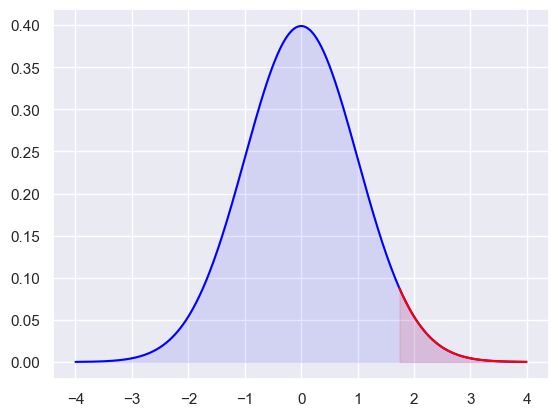

In [480]:
x_values = np.arange(-4, 4, 0.01)

mean_target = 0
std_target = 1
y_values = norm.pdf(x_values, mean_target, std_target)


fig, ax = plt.subplots()
ax.plot(x_values, y_values, color="blue", alpha=1.00)
ax.fill_between(x_values, y_values, 0, color="blue", alpha=0.1)

if z_score < 0:
    x_values2 = np.arange(-4, z_score, 0.01)
else:
    x_values2 = np.arange(z_score, 4, 0.01)

y_values2 = norm.pdf(x_values2, mean_target, std_target)
ax.plot(x_values2, y_values2, color="red", alpha=1.00)
_ = ax.fill_between(x_values2, y_values2, 0, color="red", alpha=0.1)



# The family
* They would like to know if their new design actually improved their conversion rate.


## Step 1 - Import Libraries

In [481]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest

## Step 2 - Import dataset

In [482]:
df = pd.read_csv("../../99-assets/Python/The_Family_test_conversions.csv")
df.head()

,Unnamed: 0,Design,Conversion
0,0,B,0
1,1,B,0
2,2,A,1
3,3,A,0
4,4,B,0


On supprime la première colonne qui ne sert à rien.

In [483]:
df = df.drop(df.columns[[0]], axis=1) 
df.head()

,Design,Conversion
0,B,0
1,B,0
2,A,1
3,A,0
4,B,0


## Step 3 - EDA (Exploratory Data Analysis)
 Proportion of conversion for Feature A & B


In [484]:
df.groupby("Design").mean()



,Conversion
Design,
A,0.106061
B,0.088235


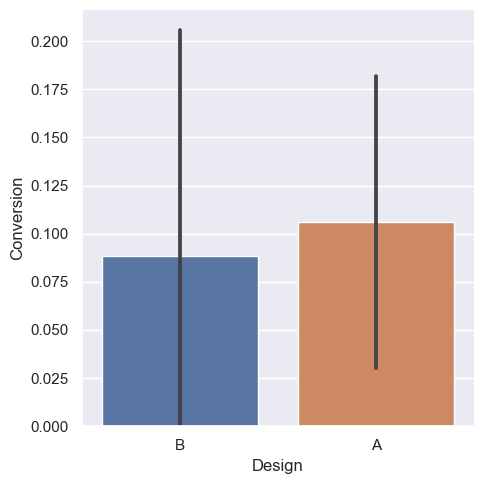

In [485]:

# TODO : à refaire sans les warnings

import warnings
warnings.filterwarnings('ignore')
sns.catplot(x="Design", y="Conversion", data=df, kind="bar", errorbar=('ci', 95))
warnings.filterwarnings('default')







## Step 4 - Define hypothesis

In [486]:
# Les hypothèses sous forme de chaines pour les utiliser en fin de programme
H1 = "The new design improved the conversion rate"
H0 = "Tne new design did not improved the conversion rate"

## Step 5 - Calculate Z-score

<img src="../../99-assets/Python/Z-score4vinted.png">


In [487]:
Feature_A = df[df["Design"]=="A"]
Feature_B = df[df["Design"]=="B"]

muA = Feature_A.Conversion.mean()
print(f"muA = {muA:.3f}")
muB = Feature_B.Conversion.mean()
print(f"muB = {muB:.3f}")

sigmaA = Feature_A.Conversion.std()
sigmaB = Feature_B.Conversion.std()

nA = len(Feature_A)
nB = len(Feature_B)

denom = sigmaB**2/nB + sigmaA**2/nA
denom = denom**.5
z_score = (muB - muA)/denom
print(f"z_score  = {z_score:.04f}\n")

muA = 0.106
muB = 0.088
z_score  = -0.2856



## Step 6 - Set $\alpha$

Confidence level = 90%

In [488]:
alpha = .10

## Step 7 - Compare p-value to $\alpha$ puis conclure (ou pas)

### À propos de la fonction `ztest()` du module statsmodels.stats.weightstats
#### Lire : 
* https://www.statology.org/z-test-python/ 
* https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ztest.html

#### Notes
* x1 = values for the first sample
* x2 = values for the second sample (if performing a two sample z-test)
* value = mean of x1 under the null hypothesis H0 (in one sample case) or the difference of the means (in two sample case)
* alternative = 
  * H1, the alternative hypothesis, has to be one of the following : 
    * larger    : difference in means larger than value 
    * smaller   : difference in means smaller than value
    * two-sided : difference in means not equal to value (default value)


In [489]:
# Sous l'hypothèse nulle les moyennes sont identiques donc value = 0
# Revoir les valeurs de muA et muB
# On veut tester si B est significativement plus petit que A
# On passe bien les données de B en premier dans la fonction ztest
z_score, p_value = ztest(Feature_B.Conversion, Feature_A.Conversion, value = 0, alternative="smaller")  
print(f"z_score  = {z_score:.04f}")
print(f"p_value  = {p_value:.04f}\n")

if p_value < alpha:
    print("HO est rejetée donc H1 est acceptée")
    print(f"Pour rappel H1 = {H1}")
else:
    print("H0 ne peut pas être rejetée. On ne peut pas conclure")
    print(f"Pour rappel H0 = {H0}")


z_score  = -0.2787
p_value  = 0.3902

H0 ne peut pas être rejetée. On ne peut pas conclure
Pour rappel H0 = Tne new design did not improved the conversion rate


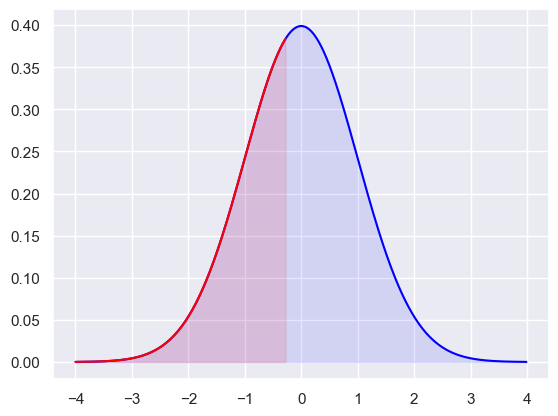

In [490]:
x_values = np.arange(-4, 4, 0.01)

mean_target = 0
std_target = 1
y_values = norm.pdf(x_values, mean_target, std_target)


fig, ax = plt.subplots()
ax.plot(x_values, y_values, color="blue", alpha=1.00)
ax.fill_between(x_values, y_values, 0, color="blue", alpha=0.1)

if z_score < 0:
    x_values2 = np.arange(-4, z_score, 0.01)
else:
    x_values2 = np.arange(z_score, 4, 0.01)

y_values2 = norm.pdf(x_values2, mean_target, std_target)
ax.plot(x_values2, y_values2, color="red", alpha=1.00)
_ = ax.fill_between(x_values2, y_values2, 0, color="red", alpha=0.1)



## Step 9 - Recos

* Faut plus de dents (=> plus d'échantillons)